## Chapter 1 The Deep Learning Revolution

## 1.2 A Tutorial Example

    For the newcomer to the field of machine learning, many of the basic concepts and
    much of the terminology can be introduced in the context of a simple example in-
    volving the fitting of a polynomial to a small synthetic data set (Bishop, 2006). This
    is a form of supervised learning problem in which we would like to make a prediction
    for a target variable, given the value of an input variable.

#### 1.2.1 Synthetic Data

    We denote the input variable by x and the target variable by t, and we assume
    that both variables take continuous values on the real axis. Suppose that we are
    given a training set comprising N observations of x, written x1 , . . . , xN , together
    with corresponding observations of the values of t, denoted t1 , . . . , tN . Our goal
    is to predict the value of t for some new value of x. The ability to make accurate
    predictions on previously unseen inputs is a key goal in machine learning and is
    known as generalization.

In [1]:
# import desired libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# set a few constantes
SEED = 42
N = 100 # The number of samples in our training set.

In [3]:
# make this code sample reproducable
np.random.seed(SEED)

<img src="../images/numpy.random.rand.png" alt="Numpy random rand" width="360">

In [4]:
np.random.rand(3, 2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

In [5]:
np.arange(1,16)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [6]:
def linearFunction(x, addNoise=False):

    # we set the value of our linear function here ... 
    returnValue = (2 * math.pi * x)

    if addNoise:
        returnValue += np.random.rand()

    return returnValue

    

In [7]:
X = np.arange(1,N)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
# no noise
linearFunction(X, False)

array([  6.28318531,  12.56637061,  18.84955592,  25.13274123,
        31.41592654,  37.69911184,  43.98229715,  50.26548246,
        56.54866776,  62.83185307,  69.11503838,  75.39822369,
        81.68140899,  87.9645943 ,  94.24777961, 100.53096491,
       106.81415022, 113.09733553, 119.38052084, 125.66370614,
       131.94689145, 138.23007676, 144.51326207, 150.79644737,
       157.07963268, 163.36281799, 169.64600329, 175.9291886 ,
       182.21237391, 188.49555922, 194.77874452, 201.06192983,
       207.34511514, 213.62830044, 219.91148575, 226.19467106,
       232.47785637, 238.76104167, 245.04422698, 251.32741229,
       257.61059759, 263.8937829 , 270.17696821, 276.46015352,
       282.74333882, 289.02652413, 295.30970944, 301.59289474,
       307.87608005, 314.15926536, 320.44245067, 326.72563597,
       333.00882128, 339.29200659, 345.57519189, 351.8583772 ,
       358.14156251, 364.42474782, 370.70793312, 376.99111843,
       383.27430374, 389.55748905, 395.84067435, 402.12

In [9]:
# add some noise to the results
y = linearFunction(X, True)
y

array([  6.34126892,  12.62445423,  18.90763953,  25.19082484,
        31.47401015,  37.75719546,  44.04038076,  50.32356607,
        56.60675138,  62.88993668,  69.17312199,  75.4563073 ,
        81.73949261,  88.02267791,  94.30586322, 100.58904853,
       106.87223383, 113.15541914, 119.43860445, 125.72178976,
       132.00497506, 138.28816037, 144.57134568, 150.85453098,
       157.13771629, 163.4209016 , 169.70408691, 175.98727221,
       182.27045752, 188.55364283, 194.83682813, 201.12001344,
       207.40319875, 213.68638406, 219.96956936, 226.25275467,
       232.53593998, 238.81912528, 245.10231059, 251.3854959 ,
       257.66868121, 263.95186651, 270.23505182, 276.51823713,
       282.80142244, 289.08460774, 295.36779305, 301.65097836,
       307.93416366, 314.21734897, 320.50053428, 326.78371959,
       333.06690489, 339.3500902 , 345.63327551, 351.91646081,
       358.19964612, 364.48283143, 370.76601674, 377.04920204,
       383.33238735, 389.61557266, 395.89875796, 402.18

What does this data look like?

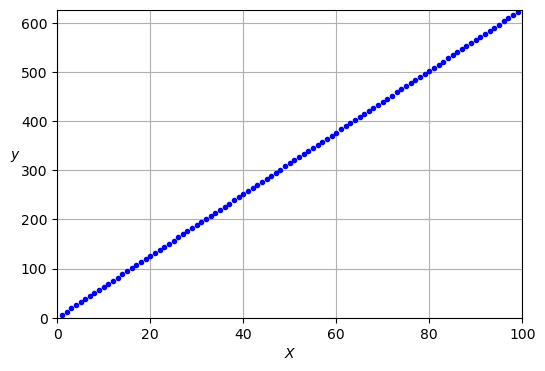

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, N, 0, y.max()+5])
plt.grid()
# save_fig("generated_data_plot")
plt.show()

#### 1.2.2 Linear Models

Our goal is to exploit this training set to predict the value bt of the target variable
for some new value x
b of the input variable. As we will see later, this involves im-
plicitly trying to discover the underlying function sin(2πx). This is intrinsically a
difficult problem as we have to generalize from a finite data set to an entire function.
Furthermore, the observed data is corrupted with noise, and so for a given x
b there
is uncertainty as to the appropriate value for bt. Probability theory provides a frame-
work for expressing such uncertainty in a precise and quantitative manner, whereas
decision theory allows us to exploit this probabilistic representation to make predic-
tions that are optimal according to appropriate criteria. Learning probabilities from
data lies at the heart of machine learning and will be explored in great detail in this
book.

To start with, however, we will proceed rather informally and consider a simple approach based on curve fitting. 
In particular, we will fit the data using a polynomial function of the form

<img src="../images/polynomial_function.png" alt="Polynomial Function" >

where M is the order of the polynomial, and xj denotes x raised to the power of j.
The polynomial coefficients w0 , . . . , wM are collectively denoted by the vector w.
Note that, although the polynomial function y(x, w) is a nonlinear function of x, it
is a linear function of the coefficients w. Functions, such as this polynomial, that are
linear in the unknown parameters have important properties, as well as significant
limitations, and are called linear models.